## Credit Card risk Prediction

Import Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\german_credit_data.csv")

### Lets Perform Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [5]:
df['Duration'].max()

72

In [6]:
df['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [7]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [8]:
print(f"Number of Unique Values in Each Features:\n{df.nunique()}")

Number of Unique Values in Each Features:
Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64


#### **Lets check summary statistics**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


Lets Create Histogram of Numeric Columns

In [10]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


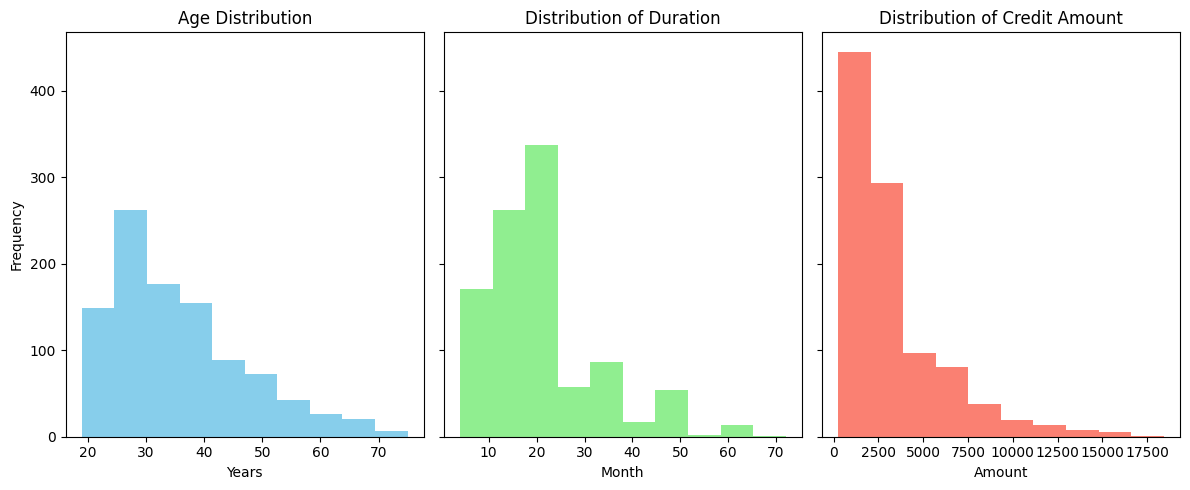

In [11]:
fig, axis = plt.subplots(1,3, figsize = (12,5), sharey=True)
df['Age'].plot(kind='hist', ax=axis[0], title='Age Distribution', xlabel='Years', color='skyblue')
df['Duration'].plot(kind='hist', ax=axis[1], title='Distribution of Duration', bins=10, xlabel='Month', color='lightgreen')
df['Credit amount'].plot(kind='hist', ax=axis[2], title='Distribution of Credit Amount', xlabel='Amount', color='salmon')

plt.tight_layout()
plt.show()

Lets create Categories of Age

<Axes: title={'center': 'Distribution of Age_cat'}, xlabel='Age_cat'>

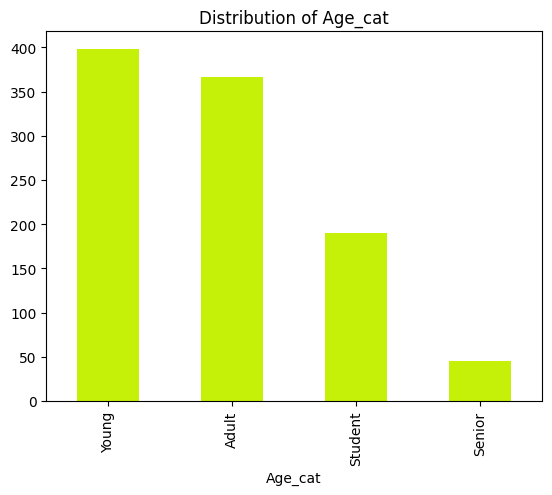

In [12]:
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)
# lets create bar plot of `Age_cat`
df['Age_cat'].value_counts().plot(kind='bar', title='Distribution of Age_cat', color='#c5f007')

Lets create bar plot of categoric columns

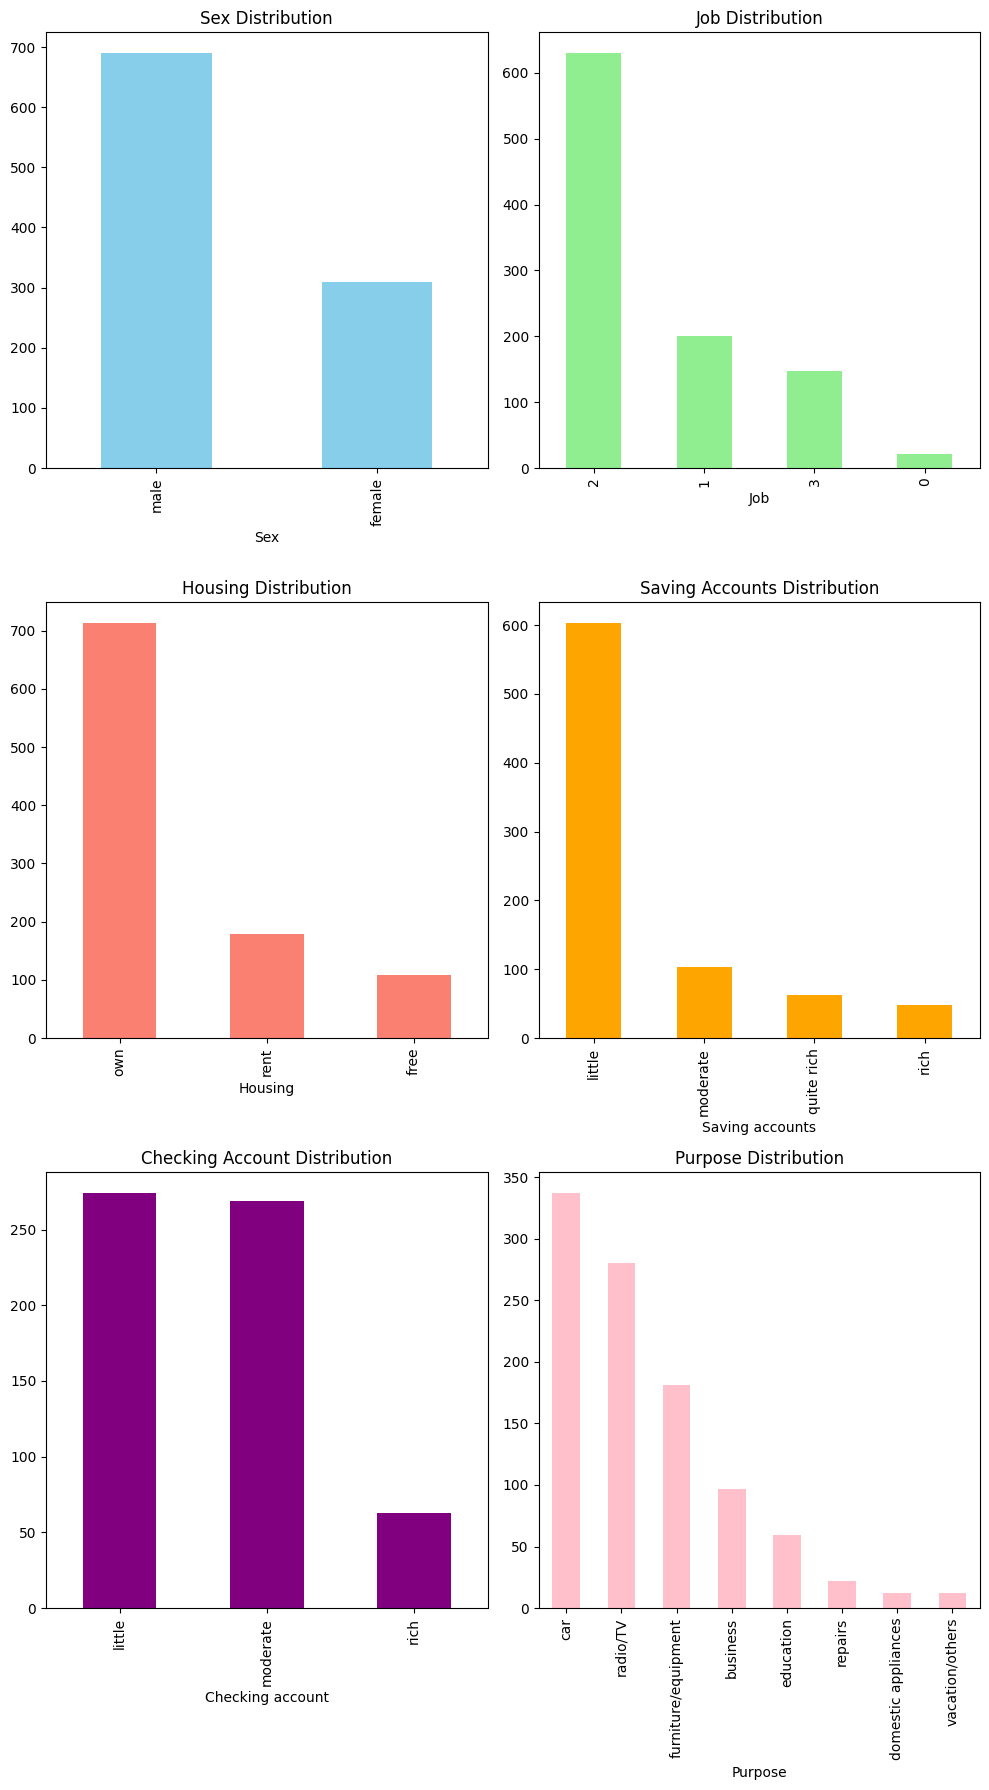

In [13]:
# Create subplots
fig, axis = plt.subplots(3, 2, figsize=(10, 18))

# Plot each categorical variable
df['Sex'].value_counts().plot(kind='bar', ax=axis[0, 0], color='skyblue', title='Sex Distribution')
df['Job'].value_counts().plot(kind='bar', ax=axis[0, 1], color='lightgreen', title='Job Distribution')
df['Housing'].value_counts().plot(kind='bar', ax=axis[1, 0], color='salmon', title='Housing Distribution')
df['Saving accounts'].value_counts().plot(kind='bar', ax=axis[1, 1], color='orange', title='Saving Accounts Distribution')
df['Checking account'].value_counts().plot(kind='bar', ax=axis[2, 0], color='purple', title='Checking Account Distribution')
df['Purpose'].value_counts().plot(kind='bar', ax=axis[2, 1], color='pink', title='Purpose Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

### **Bivariate Analysis**

### Bivariate Analysis using Box Plots

C:\Users\User\AppData\Local\Temp\ipykernel_5124\4169016554.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10)


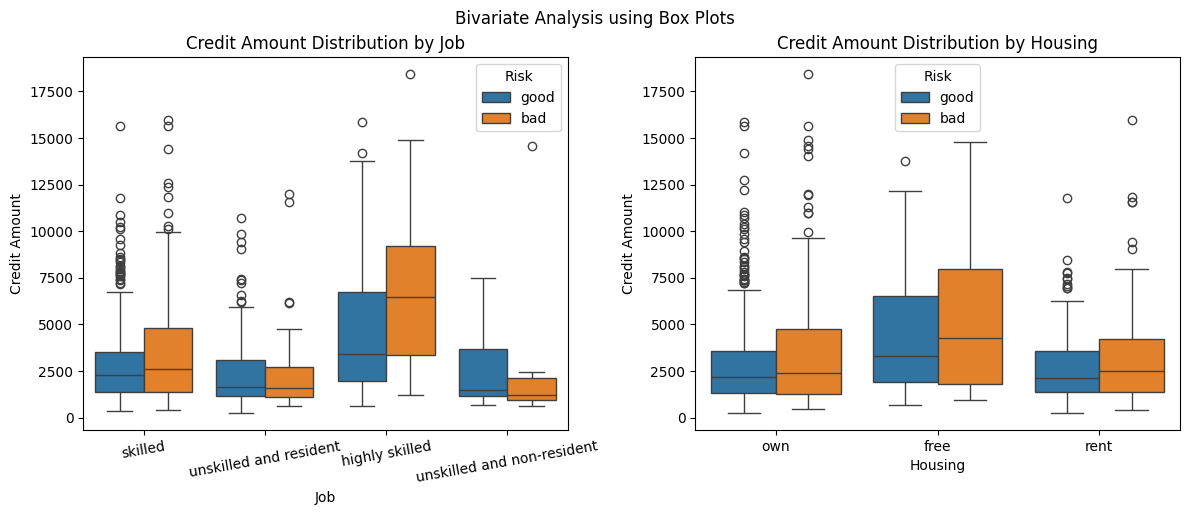

In [14]:



# Credit amount vs. Job
job_mapping = {
    0: 'unskilled and non-resident',
    1: 'unskilled and resident',
    2: 'skilled',
    3: 'highly skilled'
}

df['job_description'] = df['Job'].map(job_mapping)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Credit Amount Distribution by Job
sns.boxplot(x='job_description', y='Credit amount', data=df, ax=axes[0], hue='Risk')
axes[0].set_title('Credit Amount Distribution by Job')
axes[0].set_xlabel('Job')
axes[0].set_ylabel('Credit Amount')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=10)

# Credit Amount Distribution by Housing
sns.boxplot(x='Housing', y='Credit amount', data=df, ax=axes[1], hue='Risk')
axes[1].set_title('Credit Amount Distribution by Housing')
axes[1].set_xlabel('Housing')
axes[1].set_ylabel('Credit Amount')

# Adjust layout and titles
plt.tight_layout()
plt.suptitle('Bivariate Analysis using Box Plots', y=1.02)
plt.show()

### Bivariate Analysis using Box Plots

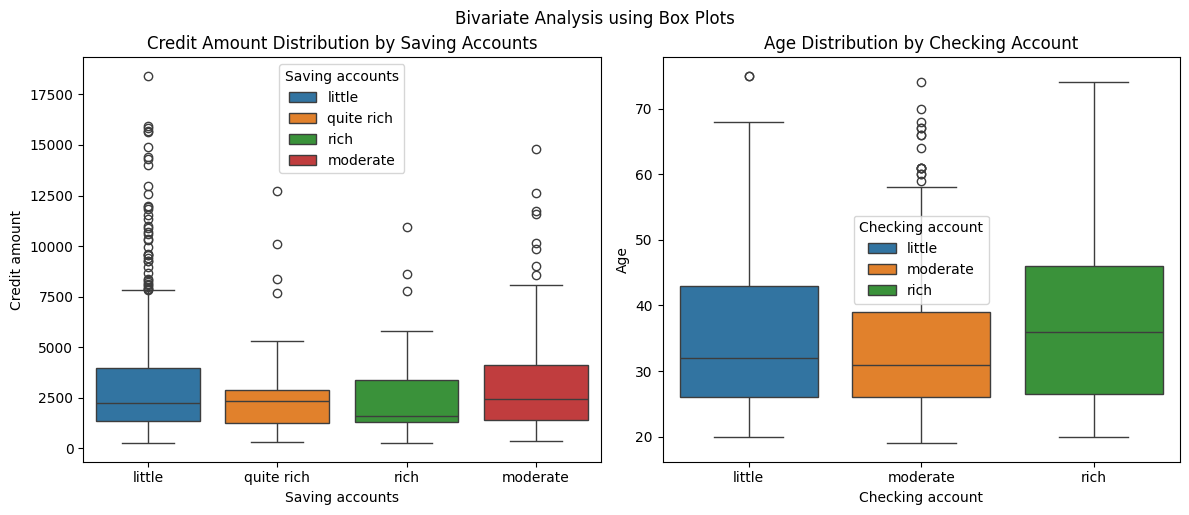

In [15]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(x='Saving accounts', y='Credit amount', data=df, ax=axes[0], hue='Saving accounts')
axes[0].set_title('Credit Amount Distribution by Saving Accounts')


# Age vs. Checking account
sns.boxplot(x='Checking account', y='Age', data=df, ax=axes[1], hue='Checking account')
axes[1].set_title('Age Distribution by Checking Account')
plt.tight_layout()
plt.suptitle('Bivariate Analysis using Box Plots', y=1.02)
plt.show()

**`Credit Amount` Distribution by `Purpose` with `Risk`**

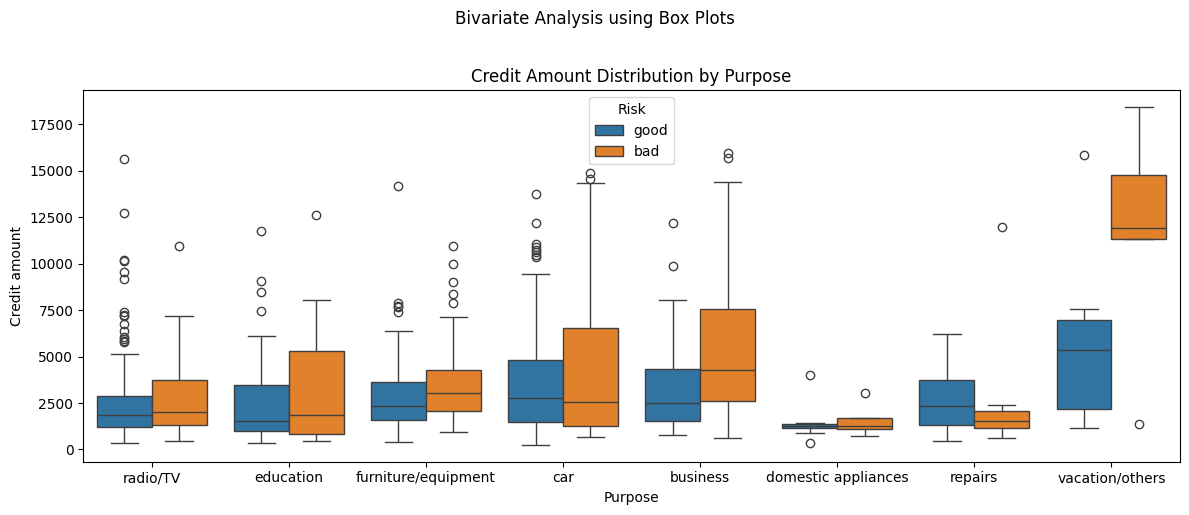

In [16]:
plt.figure(figsize=(12, 5))

# Create a box plot
sns.boxplot(x='Purpose', y='Credit amount', data=df, hue='Risk')

# Set title and adjust layout
plt.title('Credit Amount Distribution by Purpose')
plt.suptitle('Bivariate Analysis using Box Plots', y=1.02)
plt.tight_layout()
plt.show()

**Violin Plot of Age by Sex**

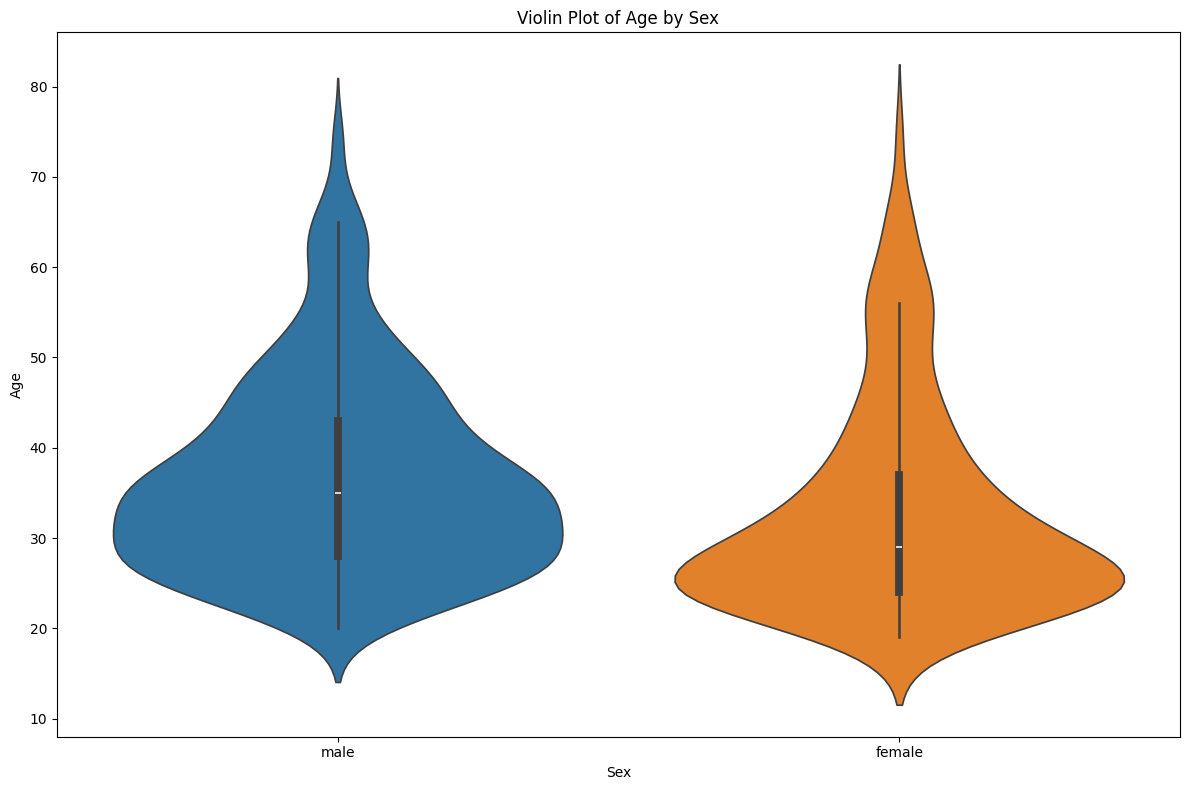

In [17]:
# Create a violin plot for Age against Sex
plt.figure(figsize=(12, 8))
sns.violinplot(x='Sex', y='Age', data=df, hue='Sex')
plt.title('Violin Plot of Age by Sex')
plt.tight_layout()
plt.show()

**Violinplot of Credit amount against Job with Risk**

<function matplotlib.pyplot.show(close=None, block=None)>

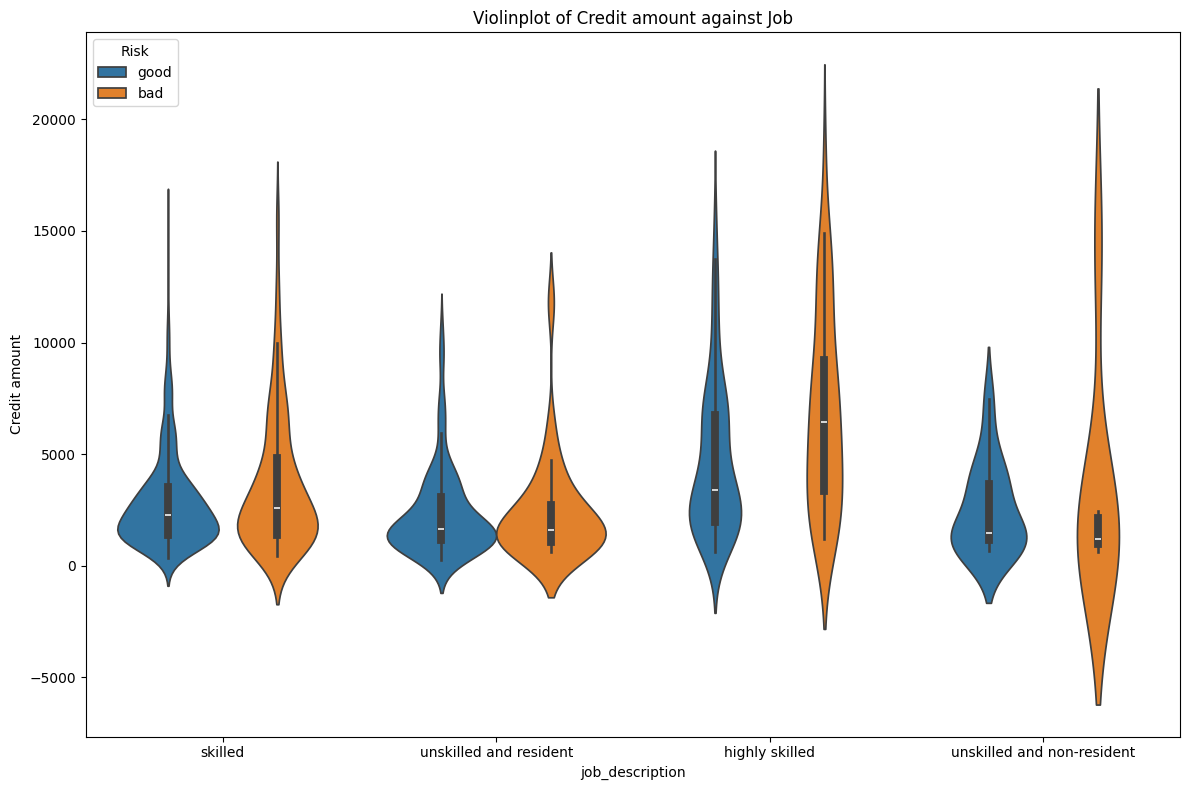

In [18]:
plt.figure(figsize=(12,8))
sns.violinplot(x = 'job_description', y='Credit amount', data=df, hue='Risk')
plt.title('Violinplot of Credit amount against Job')
plt.tight_layout()
plt.show

**Violin Plot of Duration by Housing**

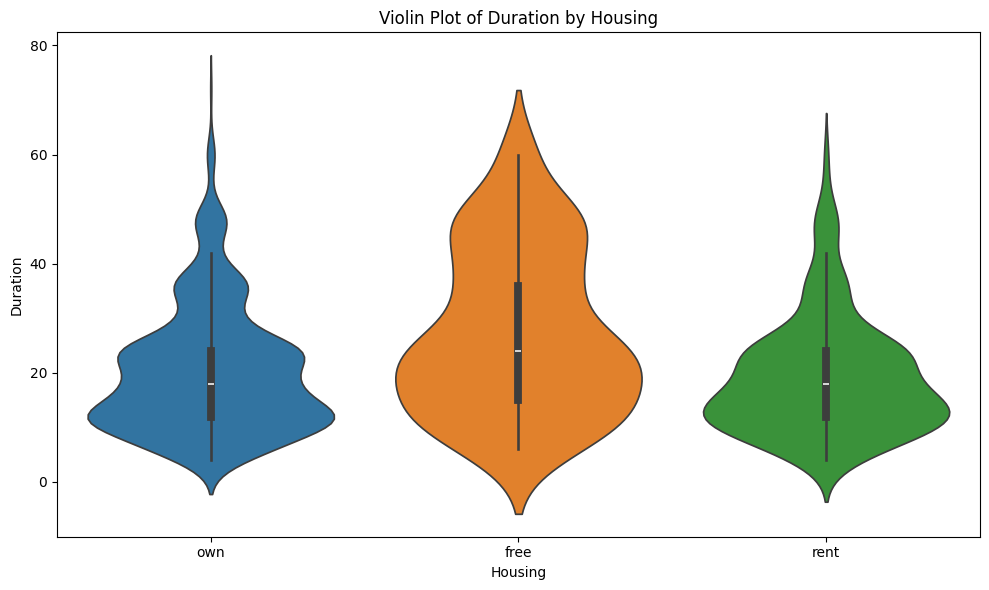

In [19]:
# Create a violin plot for Duration against Housing
plt.figure(figsize=(10, 6))
sns.violinplot(x='Housing', y='Duration', data=df, hue='Housing')
plt.title('Violin Plot of Duration by Housing')
plt.tight_layout()
plt.show()

**Violin plot of Risk by Age**

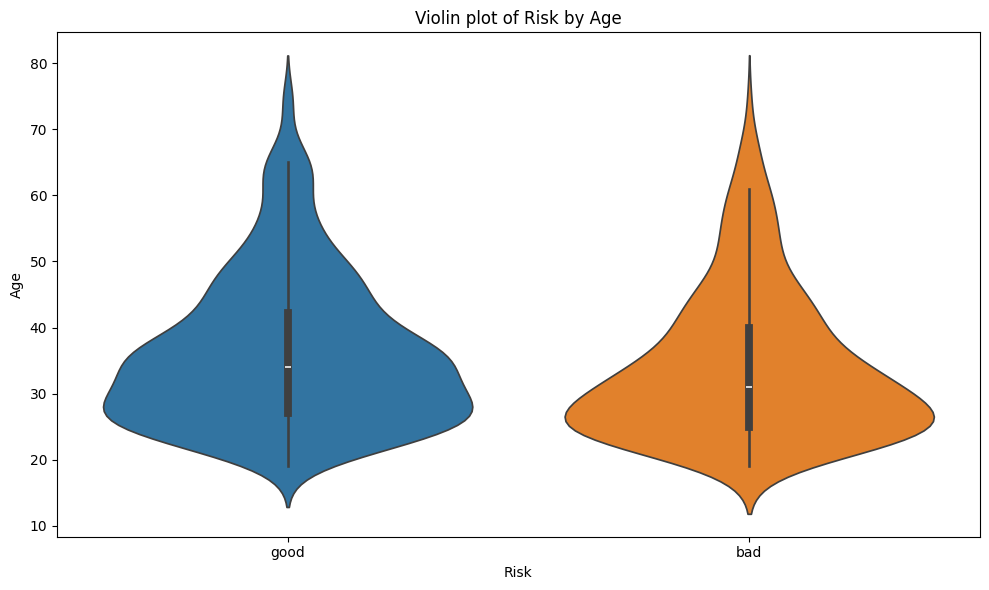

In [20]:
plt.figure(figsize=(10,6))
sns.violinplot(x ='Risk', y='Age', data=df, hue='Risk')
plt.title('Violin plot of Risk by Age')
plt.tight_layout()
plt.show()

**Violin Plot of Credit Amount by Purpose**

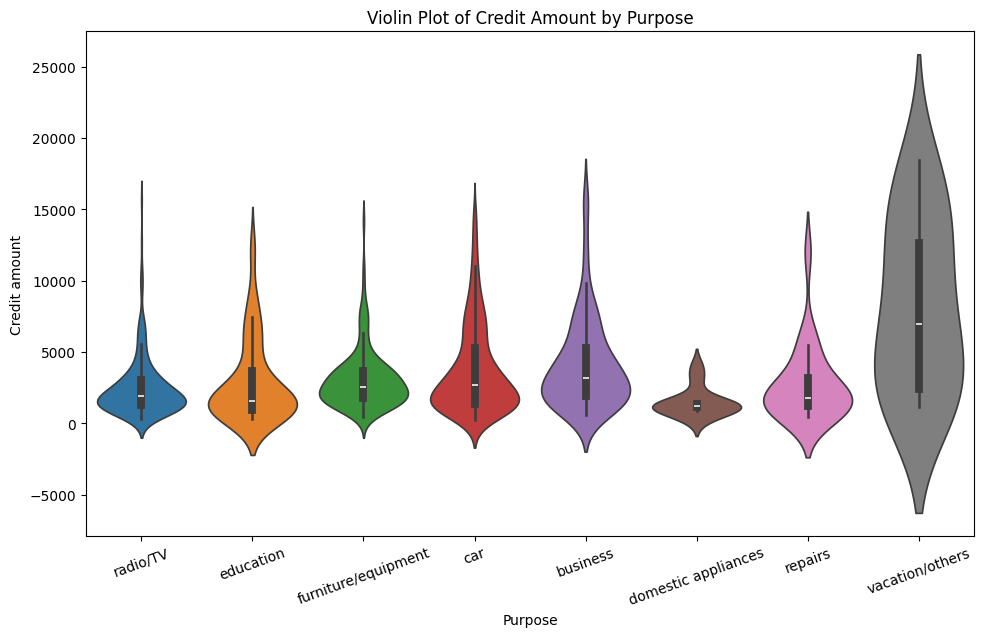

In [21]:
# Create a violin plot for Credit amount against Purpose
plt.figure(figsize=(10, 6))
sns.violinplot(x='Purpose', y='Credit amount', data=df, hue='Purpose')
plt.title('Violin Plot of Credit Amount by Purpose')
plt.tight_layout()
plt.xticks(rotation=20)
plt.show()

## Correlation Heatmap

**Correlation between Numerical Features**

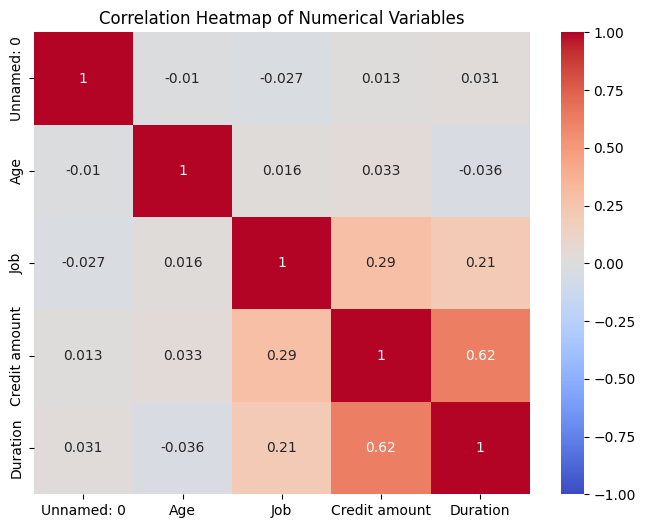

In [22]:
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


### **Good and Bad Credit Distriibution Against Duration**

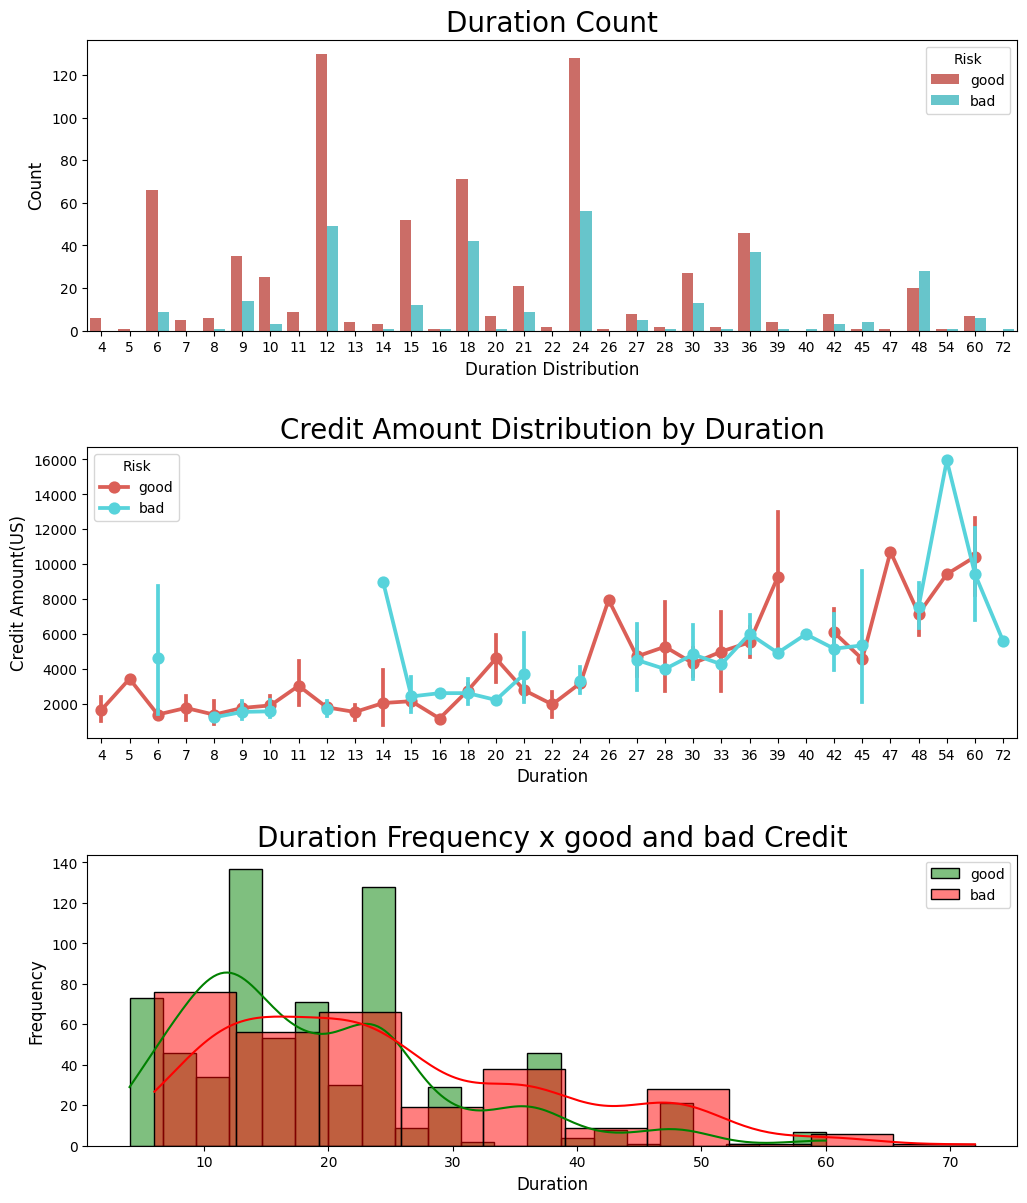

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(12, 14))

# Duration Count plot
g = plt.subplot(311)
g = sns.countplot(x="Duration", data=df, palette="hls", hue="Risk")
g.set_xlabel("Duration Distribution", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

# Credit Amount distribution by Duration plot
g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y="Credit amount", data=df, hue="Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount Distribution by Duration", fontsize=20)

# Data subsets based on 'Risk'
df_good = df[df['Risk'] == 'good']
df_bad = df[df['Risk'] == 'bad']

# Duration Frequency plot for good and bad Credit
g2 = plt.subplot(313)
sns.histplot(df_good["Duration"], color='g', kde=True, ax=g2, label='good')
sns.histplot(df_bad["Duration"], color='r', kde=True, ax=g2, label='bad')

g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)
g2.legend()

# Adjust layout
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)

# Show plot
plt.show()


## Looking the total values in each category

In [24]:
print("Purpose : ",df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Risk : ",df['Risk'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Aget_cat : ",df['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


**Removing Null Values**

In [25]:
df.isnull().sum()


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Age_cat               0
job_description       0
dtype: int64

## Transforming the data into Dummy variables

In [26]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat,job_description
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Senior,skilled
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Student,skilled
2,2,49,male,1,own,little,NaN,2096,12,education,good,Adult,unskilled and resident
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Adult,skilled
4,4,53,male,2,free,little,little,4870,24,car,bad,Adult,skilled


In [27]:
df.drop(['job_description', 'Age_cat'], axis=1, inplace=True)

In [28]:
df['Checking account'] = df['Checking account'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')
df = df.merge(pd.get_dummies(df['Purpose'], drop_first=True, prefix='Purpose'),
              left_index=True, right_index=True)
#Sex feature in dummies
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df = df.merge(pd.get_dummies(df.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
# df = df.merge(pd.get_dummies(df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [29]:
df['Risk_bad'].value_counts()

Risk_bad
False    700
True     300
Name: count, dtype: int64

In [ ]:
# Excluding the missing columns
del df["Saving accounts"]
del df["Checking account"]
del df["Purpose"]
del df["Sex"]
del df["Housing"]
# del df["Age_cat"]
del df["Risk"]
del df['Risk_good']

## Correlation
- Looking the whole data correlation

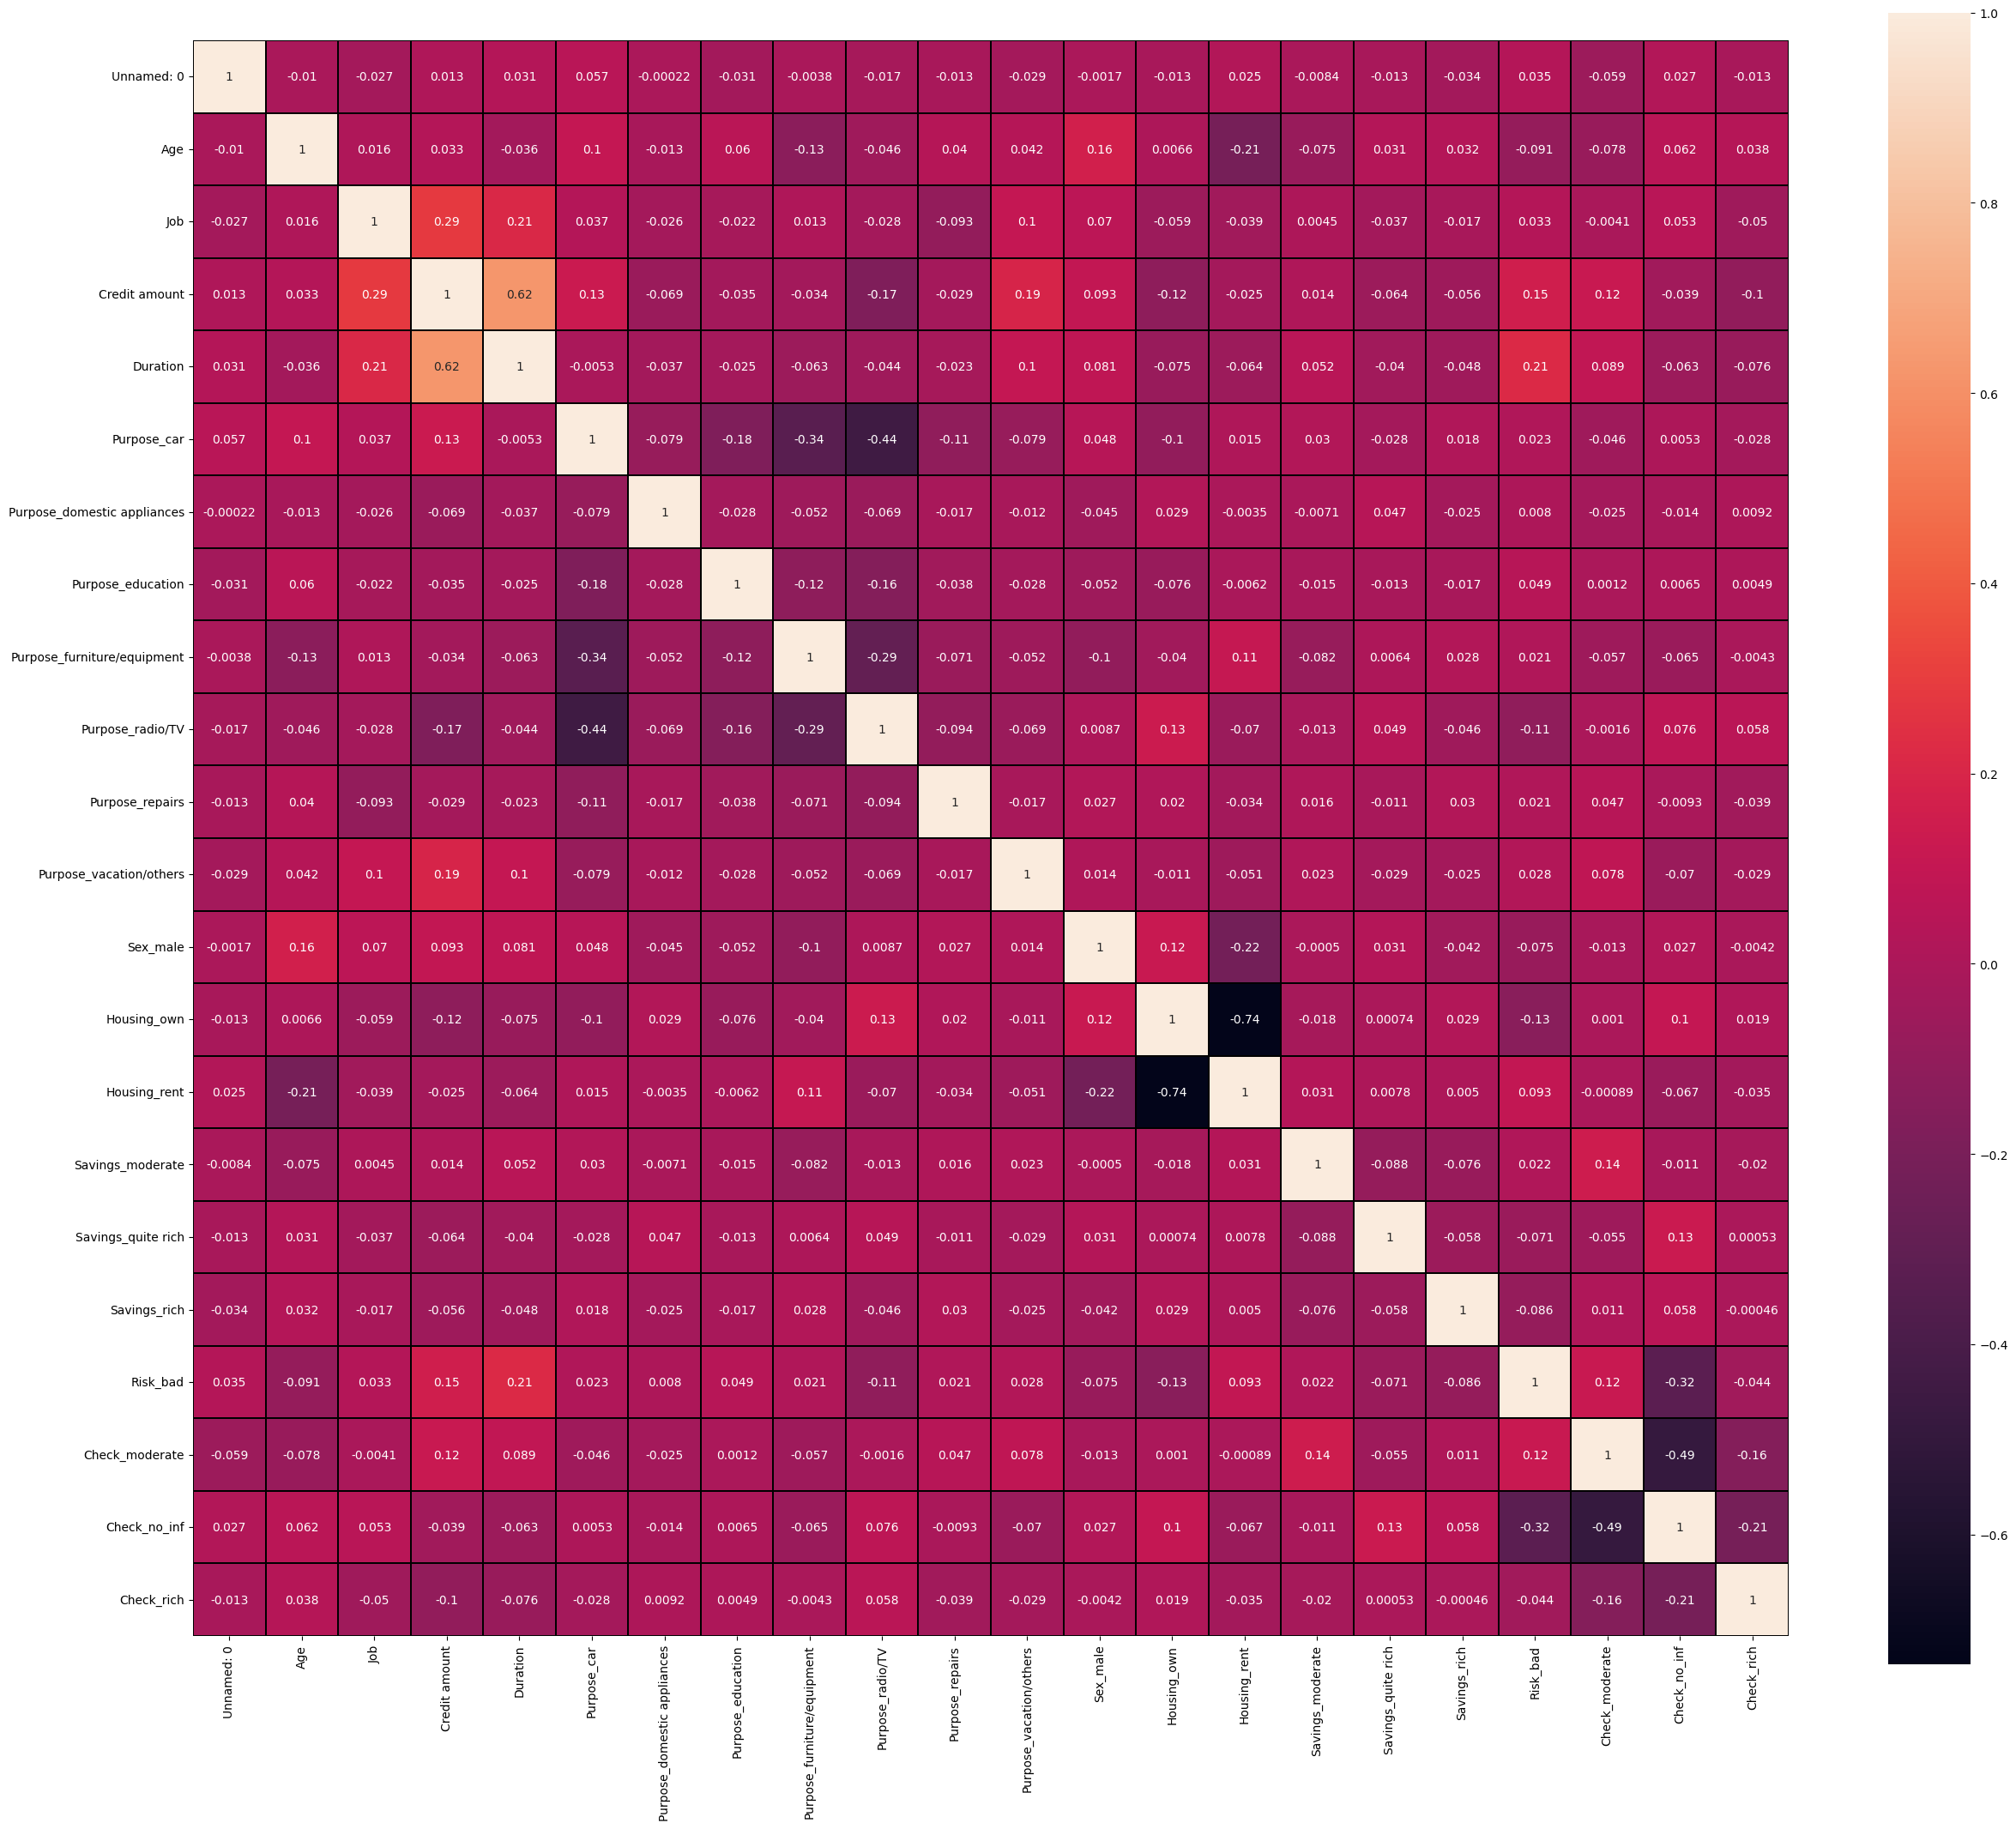

In [ ]:
plt.figure(figsize=(30,25))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
              square=True,linecolor='black', annot=True)
plt.show()

## **Machine Learninig**

**Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

**Log Normalize `Credit amount`**

In [ ]:
df['Credit amount'] = np.log(df['Credit amount'])

**Split the data into X and y**

In [ ]:
X = df.drop(['Unnamed: 0', 'Risk_bad'], axis=1)
y = df['Risk_bad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
seed= 42
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('GaussianNB', GaussianNB()),
    ('RandomForestClassifier', RandomForestClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('SVC', SVC())
]

scoring = 'recall'
names = []
results = []
for name, model in models:
    k_fold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_result = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='recall')
    names.append(name)
    results.append(results)
    msg = "%s:%f (%f)" %(name, cv_result.mean(), cv_result.std())
    print(msg)
    

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Logistic Regression:0.343836 (0.131555)
Decision Tree:0.429199 (0.064396)
KNeighborsClassifier:0.246670 (0.078495)
GaussianNB:0.527257 (0.093768)
RandomForestClassifier:0.322839 (0.104719)
XGBClassifier:0.419096 (0.076655)
SVC:0.000000 (0.000000)


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [ ]:
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

Training score data: 
0.69625
0.64


[[98 43]
 [29 30]]


              precision    recall  f1-score   support

       False       0.77      0.70      0.73       141
        True       0.41      0.51      0.45        59

    accuracy                           0.64       200
   macro avg       0.59      0.60      0.59       200
weighted avg       0.67      0.64      0.65       200



In [ ]:
#Seting the Hyper Parameters
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=2, ...),
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 6, 10],
                         'min_child_weight': [3, 5, 10],
                         'subsample': [0.75, 0.8, 0.85]},
             scoring='recall')

In [ ]:
grid_search.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.64
[[98 43]
 [29 30]]


In [163]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(grid_search, file)
